# Building a Decision Tree Classifier

## Import Library
To build and visualize the decision tree classifier, we import the following libraries:


In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

## Prepare the Dataset: Play Tennis

We begin by preparing a simple, classic dataset to illustrate decision tree classification. This dataset contains weather conditions and whether to play tennis:

| Feature        | Description                                              |
|----------------|----------------------------------------------------------|
| **Outlook**     | Weather outlook (Sunny, Overcast, Rain)                 |
| **Humidity**    | Humidity level (Low, Medium, High)                      |
| **Wind**        | Wind strength (Weak, Normal, Strong)                    |
| **Temperature** | Temperature level (Cool, Mild, Hot)                     |
| **PlayTennis**  | Target variable indicating play or not (Yes/No)         |

In [18]:
data = {
    'Outlook':    ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                   'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Humidity':   ['High', 'High', 'High', 'High', 'Medium', 'Medium', 'Medium',
                   'High', 'Low', 'Medium', 'Medium', 'High', 'Medium', 'High'],
    'Wind':       ['Weak', 'Strong', 'Weak', 'Weak', 'Normal', 'Strong', 'Strong',
                   'Weak', 'Normal', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Temperature':['Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild',
                   'Hot', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Cool'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                   'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

df

Outlook Humidity    Wind Temperature PlayTennis
0      Sunny     High    Weak         Hot         No
1      Sunny     High  Strong         Hot         No
2   Overcast     High    Weak        Mild        Yes
3       Rain     High    Weak        Cool        Yes
4       Rain   Medium  Normal        Cool        Yes
5       Rain   Medium  Strong        Cool         No
6   Overcast   Medium  Strong        Mild        Yes
7      Sunny     High    Weak         Hot         No
8      Sunny      Low  Normal        Mild        Yes
9       Rain   Medium    Weak        Cool        Yes
10     Sunny   Medium  Strong        Mild        Yes
11  Overcast     High  Strong        Mild        Yes
12  Overcast   Medium    Weak        Mild        Yes
13      Rain     High  Strong        Cool         No

## Encoding Categorical Features

Machine learning models generally require numeric input data. Since our dataset contains categorical features, we need to convert these into numeric formats suitable for modeling.

### 1. Ordinal Encoding for Ordered Categories

Some features have a natural order or ranking (ordinal), such as:

- **Humidity:** Low < Medium < High  
- **Wind:** Weak < Normal < Strong  
- **Temperature:** Cool < Mild < Hot  

For these ordinal features, we use `OrdinalEncoder` which preserves the order by mapping categories to integers in a specified sequence. This ensures that the model understands the relative ranking of values rather than treating them as arbitrary labels.

### 2. Label Encoding for the Target Variable

The target column `PlayTennis` contains two classes: `Yes` and `No`. We use `LabelEncoder` to convert these class labels into numeric form:

- No → 0  
- Yes → 1  

This numeric target is required for training the classifier.

### 3. One-Hot Encoding for Nominal Features
The `Outlook` feature is nominal (no inherent order) with categories like Sunny, Overcast, and Rain. For such features, one-hot encoding is used to convert each category into a separate binary (0 or 1) feature column. This avoids imposing any ordinal relationship on nominal data.

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding for ordinal features
ordinal_encoder = OrdinalEncoder(categories=[
    ['Low', 'Medium', 'High'],        # Humidity
    ['Weak', 'Normal', 'Strong'],     # Wind
    ['Cool', 'Mild', 'Hot']           # Temperature
])

df[['Humidity', 'Wind', 'Temperature']] = ordinal_encoder.fit_transform(
    df[['Humidity', 'Wind', 'Temperature']]
)

# Label encoding for target
from sklearn.preprocessing import LabelEncoder
le_play = LabelEncoder()
df['PlayTennis'] = le_play.fit_transform(df['PlayTennis'])  # No=0, Yes=1

# One-hot encoding for nominal feature
df = pd.get_dummies(df, columns=['Outlook'], prefix='Outlook')

In [20]:
df.head()

Humidity  Wind  Temperature  PlayTennis  Outlook_Overcast  Outlook_Rain  \
0       2.0   0.0          2.0           0             False         False   
1       2.0   2.0          2.0           0             False         False   
2       2.0   0.0          1.0           1              True         False   
3       2.0   0.0          0.0           1             False          True   
4       1.0   1.0          0.0           1             False          True   

   Outlook_Sunny  
0           True  
1           True  
2          False  
3          False  
4          False

## Defining Features and Target

We separate the dataset into:

- **Features (X):** The predictor variables — Outlook, Humidity, and Wind  
- **Target (y):** The variable we want to predict — PlayTennis (whether to play tennis or not)

In [21]:
X = df[['Humidity', 'Wind', 'Temperature', 'Outlook_Overcast', 'Outlook_Rain', 'Outlook_Sunny']]
y = df['PlayTennis']

In [22]:
X.head()

Humidity  Wind  Temperature  Outlook_Overcast  Outlook_Rain  Outlook_Sunny
0       2.0   0.0          2.0             False         False           True
1       2.0   2.0          2.0             False         False           True
2       2.0   0.0          1.0              True         False          False
3       2.0   0.0          0.0             False          True          False
4       1.0   1.0          0.0             False          True          False

In [23]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: PlayTennis, dtype: int64

## 4. Train the Decision Tree
We create and train a Decision Tree classifier with the following settings:

- **criterion='entropy'**: Use information gain based on entropy to decide splits  
- **max_depth=3**: Limit the tree depth to 3 levels to avoid overfitting  
- **random_state=42**: Set seed for reproducibility  

In [24]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

## 5. Visualize the Tree
We plot the trained decision tree to better understand the decision rules learned by the model:

- Nodes are colored based on the predicted class
- Feature names and class names are labeled for clarity
- The plot helps us see how the model splits on different weather features


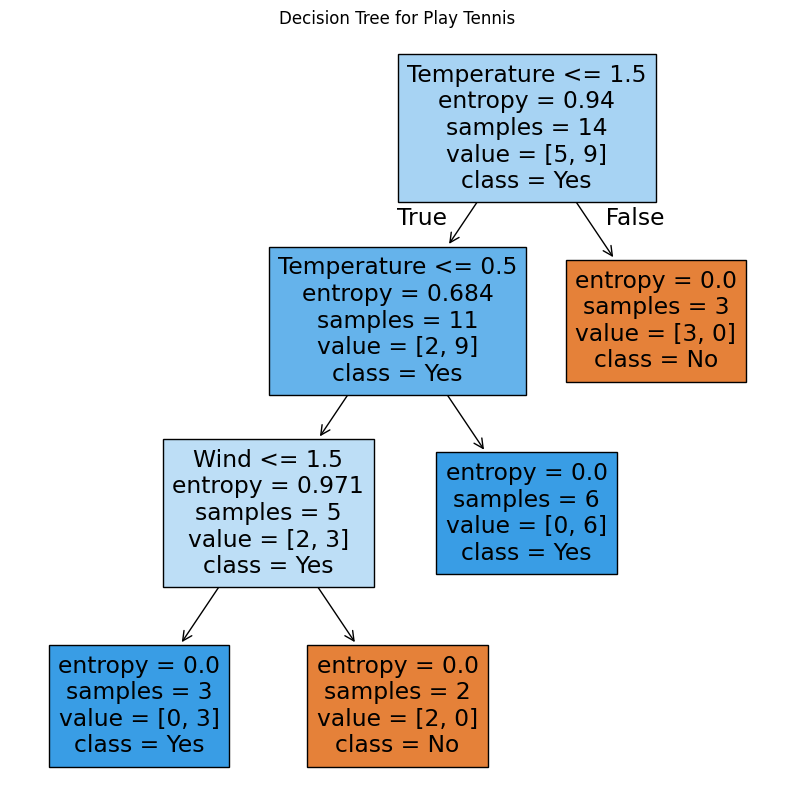

In [25]:
plt.figure(figsize=(10, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Play Tennis")
plt.show()

## Making Predictions with the Trained Model

We can use our trained decision tree to predict whether to play tennis given new weather conditions:

1. Define input features:  
   - **Nominal** feature: `Outlook` (e.g., Sunny, Rain, Overcast)  
   - **Ordinal** features: `Humidity`, `Wind`, and `Temperature`
2. Encode ordinal features using the same `OrdinalEncoder` instances used during training.
3. Apply one-hot encoding to the `Outlook` feature to match the training feature format.
4. Create a DataFrame combining all the encoded features.
5. Use the model’s `.predict()` method to generate the prediction.
6. Decode the numeric prediction back to the original label (`Yes` or `No`) using `LabelEncoder`.

This process allows the model to evaluate new weather conditions and decide whether playing tennis is likely to be a good idea.


In [26]:
import pandas as pd

# Example input (change as needed)
outlook = 'Sunny'
humidity = 'High'
wind = 'Weak'
temperature = 'Mild'

# Encode ordinal features
humidity_encoded = le_humidity.transform([humidity])[0]
wind_encoded = le_wind.transform([wind])[0]
temperature_encoded = le_temp.transform([temperature])[0]

# Create one-hot encoding for 'Outlook'
outlook_features = {'Outlook_Overcast': 0, 'Outlook_Rain': 0, 'Outlook_Sunny': 0}
outlook_col = f"Outlook_{outlook}"
if outlook_col in outlook_features:
    outlook_features[outlook_col] = 1

# Combine all features into a single row
input_data = pd.DataFrame([{
    'Humidity': humidity_encoded,
    'Wind': wind_encoded,
    'Temperature': temperature_encoded,
    **outlook_features
}])

# Predict
prediction = model.predict(input_data)[0]
predicted_play = le_play.inverse_transform([prediction])[0]

print(f"Prediction for Outlook={outlook}, Humidity={humidity}, Wind={wind}, Temperature={temperature}: PlayTennis={predicted_play}")

Prediction for Outlook=Sunny, Humidity=High, Wind=Weak, Temperature=Mild: PlayTennis=No


### Prediction Result

For the input conditions:

- **Outlook:** Sunny  
- **Humidity:** High  
- **Wind:** Weak  
- **Temperature:** Mild  

After encoding (ordinal for Humidity, Wind, and Temperature; one-hot for Outlook), the model predicts: **PlayTennis = No**

This means that under these weather conditions, the decision tree suggests it’s not ideal to play tennis.
